In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from collections import defaultdict
from collections import Counter
from pandas import DataFrame,Series

In [3]:
ls

 驱动器 D 中的卷是 DATA
 卷的序列号是 F008-4CA2

 D:\Program Files\python exercise 的目录

2019/01/25  15:01    <DIR>          .
2019/01/25  15:01    <DIR>          ..
2019/03/31  17:50    <DIR>          .idea
2018/11/14  11:21    <DIR>          __pycache__
2018/12/20  17:01                 7 a.txt
2019/01/04  15:34                 2 b.txt
2018/12/04  20:29         8,731,136 chromedriver.exe
2019/01/04  15:34               611 code.png
2019/04/01  09:52    <DIR>          data analysis
2018/12/28  17:16               367 easy_write.py
2018/12/20  14:08               282 exercise_logging.py
2019/01/09  20:12         6,990,688 geckodriver.log
2018/12/20  14:08               826 geocode.py
2019/01/08  16:16    <DIR>          img
2019/01/07  11:29    <DIR>          mycode
2019/01/09  18:45         2,841,088 nanjing(已自动还原).xls
2019/01/09  18:46         2,808,320 nanjing.xls
2018/12/19  17:09    <DIR>          pydata-book
2019/01/03  10:51    <DIR>          selnm
2019/01/25  15:01             4,054 test.py
2

In [4]:
path = "../pydata-book/datasets/bitly_usagov/example.txt"

In [5]:
records = [json.loads(line) for line in open(path)]

FileNotFoundError: [Errno 2] No such file or directory: '../pydata-book/datasets/bitly_usagov/example.txt'

In [6]:
time_zones = [res["tz"] for res in records if "tz" in res]

NameError: name 'records' is not defined

In [7]:
frame = DataFrame(records)

NameError: name 'records' is not defined

In [8]:
clean_tz[clean_tz == ""] = "Unknown"

NameError: name 'clean_tz' is not defined

In [9]:
tz_counts = clean_tz.value_counts()

NameError: name 'clean_tz' is not defined

In [10]:
clean_tz = frame["tz"].fillna('Missing')

NameError: name 'frame' is not defined

In [11]:
tz_counts[:10].plot(kind="barh", rot=0)

NameError: name 'tz_counts' is not defined

In [11]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [12]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [13]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [14]:
cframe = frame[frame.a.notnull()]

In [15]:
oprating_system = np.where(cframe['a'].str.contains("Windows"), "Windows", "Not Windows")

In [16]:
oprating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [17]:
by_tz_os = cframe.groupby(["tz", oprating_system])

In [18]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [19]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [20]:
indexer = agg_counts.sum(1).argsort()

In [21]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [22]:
count_subset = agg_counts.take(indexer)[-10:]

In [23]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


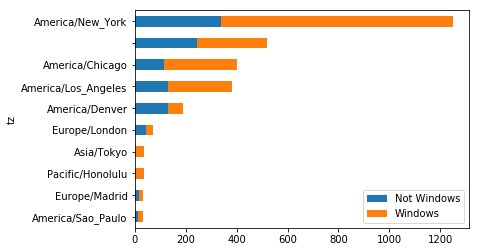

In [24]:
count_subset.plot(kind="barh",stacked="True")